In [1]:
%run chapter4-linear-algebra.ipynb

In [2]:
def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

In [4]:
from typing import Callable
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

In [5]:
def square(x: float) -> float:
    return x * x

In [6]:
def derivative(x: float) -> float:
    return 2 * x

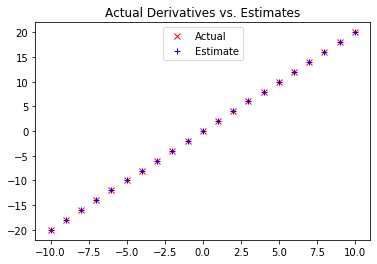

In [8]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual') # red x
plt.plot(xs, estimates, 'b+', label='Estimate') # blue +
plt.legend(loc=9)
plt.show()

In [10]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [11]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

In [13]:
import random

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]
    
v = [random.uniform(-10, 10) for i in range(3)]
    
for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001

0 [7.053406359096165, -4.448535319665444, 1.5233318389127988]
1 [6.912338231914242, -4.359564613272135, 1.4928652021345428]
2 [6.774091467275957, -4.272373321006692, 1.463007898091852]
3 [6.638609637930438, -4.186925854586558, 1.433747740130015]
4 [6.505837445171829, -4.103187337494827, 1.4050727853274145]
5 [6.3757206962683926, -4.0211235907449305, 1.3769713296208663]
6 [6.248206282343025, -3.940701118930032, 1.349431903028449]
7 [6.123242156696165, -3.861887096551431, 1.32244326496788]
8 [6.000777313562241, -3.7846493546204023, 1.2959943996685224]
9 [5.880761767290997, -3.7089563675279944, 1.270074511675152]
10 [5.763146531945177, -3.6347772401774345, 1.2446730214416488]
11 [5.647883601306273, -3.5620816953738856, 1.219779561012816]
12 [5.534925929280148, -3.490840061466408, 1.1953839697925597]
13 [5.424227410694545, -3.42102326023708, 1.1714762903967084]
14 [5.315742862480654, -3.3526027950323383, 1.1480467645887742]
15 [5.209428005231041, -3.2855507391316916, 1.1250858292969987]
16

428 [0.0012392510667501824, -0.0007815872019427625, 0.0002676424000373499]
429 [0.0012144660454151788, -0.0007659554579039072, 0.00026228955203660287]
430 [0.001190176724506875, -0.000750636348745829, 0.0002570437609958708]
431 [0.0011663731900167377, -0.0007356236217709125, 0.0002519028857759534]
432 [0.0011430457262164029, -0.0007209111493354942, 0.0002468648280604343]
433 [0.0011201848116920749, -0.0007064929263487843, 0.00024192753149922562]
434 [0.0010977811154582334, -0.0006923630678218086, 0.0002370889808692411]
435 [0.0010758254931490688, -0.0006785158064653724, 0.0002323472012518563]
436 [0.0010543089832860874, -0.000664945490336065, 0.00022770025722681917]
437 [0.0010332228036203657, -0.0006516465805293436, 0.00022314625208228278]
438 [0.0010125583475479583, -0.0006386136489187567, 0.00021868332704063712]
439 [0.0009923071805969992, -0.0006258413759403816, 0.0002143096604998244]
440 [0.0009724610369850592, -0.0006133245484215739, 0.0002100234672898279]
441 [0.0009530118162453

834 [3.3958307181543385e-07, -2.1417272903655867e-07, 7.334012517018066e-08]
835 [3.3279141037912515e-07, -2.098892744558275e-07, 7.187332266677704e-08]
836 [3.2613558217154264e-07, -2.0569148896671096e-07, 7.04358562134415e-08]
837 [3.196128705281118e-07, -2.0157765918737672e-07, 6.902713908917268e-08]
838 [3.1322061311754953e-07, -1.975461060036292e-07, 6.764659630738922e-08]
839 [3.0695620085519853e-07, -1.9359518388355662e-07, 6.629366438124144e-08]
840 [3.008170768380946e-07, -1.897232802058855e-07, 6.496779109361661e-08]
841 [2.948007353013327e-07, -1.8592881460176776e-07, 6.366843527174428e-08]
842 [2.8890472059530605e-07, -1.822102383097324e-07, 6.239506656630939e-08]
843 [2.8312662618339996e-07, -1.7856603354353776e-07, 6.11471652349832e-08]
844 [2.7746409365973196e-07, -1.74994712872667e-07, 5.992422193028354e-08]
845 [2.719148117865373e-07, -1.7149481861521365e-07, 5.872573749167787e-08]
846 [2.6647651555080657e-07, -1.6806492224290938e-07, 5.755122274184431e-08]
847 [2.6114

In [14]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [15]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

In [17]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
learning_rate = 0.001

for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.047488801676714, -0.18224390276639624]
1 [11.292142725378863, -0.15883192615918673]
2 [25.802981970246137, -0.15722211958148946]
3 [16.124253803726248, -0.14110469337208034]
4 [22.57998160822122, -0.13469823018160992]
5 [18.27401756908626, -0.12184885211302551]
6 [21.146108432567353, -0.11333113683971324]
7 [19.230432344340734, -0.10195836613346644]
8 [20.508199667958596, -0.09252401705685878]
9 [19.65593829745456, -0.08183076935478653]
10 [20.22440732482845, -0.07201116951862235]
11 [19.845248303169903, -0.061642739854756615]
12 [20.09815773904582, -0.051674206071877234]
13 [19.929477113850364, -0.04147269992068765]
14 [20.041997292361888, -0.031460277406995966]
15 [19.966956345717215, -0.021355359559820125]
16 [20.01701876204706, -0.011345692494983248]
17 [19.983637140022118, -0.0013059823479462645]
18 [20.0059127216229, 0.008680266756771767]
19 [19.991064894944284, 0.01866881894488115]
20 [20.00097838389111, 0.028622546201935658]
21 [19.99437604049083, 0.03856627949342287]
22 

325 [19.998378350683527, 2.2999529141111212]
326 [19.998381593008197, 2.3053513866335824]
327 [19.998384828850167, 2.3107390654533235]
328 [19.998388058222393, 2.316115972151267]
329 [19.998391281137817, 2.321482128265187]
330 [19.99839449760934, 2.3268375552897944]
331 [19.99839770764986, 2.3321822746768244]
332 [19.99840091127222, 2.3375163078351204]
333 [19.998404108489265, 2.342839676130722]
334 [19.99840729931379, 2.34815240088695]
335 [19.99841048375859, 2.35345450338449]
336 [19.998413661836405, 2.3587460048614792]
337 [19.99841683355998, 2.3640269265135925]
338 [19.99841999894201, 2.369297289494125]
339 [19.998423157995173, 2.374557114914079]
340 [19.998426310732132, 2.379806423842246]
341 [19.99842945716551, 2.3850452373052935]
342 [19.99843259730791, 2.390273576287848]
343 [19.99843573117191, 2.3954914617325804]
344 [19.99843885877007, 2.4006989145402873]
345 [19.998441980114904, 2.4058959555699766]
346 [19.99844509521893, 2.4110826056389514]
347 [19.998448204094615, 2.416258

678 [19.99919992577797, 3.667875939793906]
679 [19.99920152544589, 3.670539387840096]
680 [19.999203121915432, 3.6731975105898615]
681 [19.999204715192995, 3.675850318690597]
682 [19.99920630528496, 3.678497822768409]
683 [19.9992078921977, 3.681140033428157]
684 [19.999209475937562, 3.6837769612534985]
685 [19.999211056510898, 3.686408616806929]
686 [19.99921263392404, 3.6890350106298264]
687 [19.999214208183297, 3.6916561532424907]
688 [19.999215779294982, 3.694272055144189]
689 [19.999217347265393, 3.6968827268131954]
690 [19.999218912100797, 3.6994881787068343]
691 [19.999220473807476, 3.7020884212615215]
692 [19.999222032391675, 3.7046834648928058]
693 [19.999223587859646, 3.7072733199954118]
694 [19.99922514021761, 3.7098579969432803]
695 [19.999226689471797, 3.7124375060896115]
696 [19.9992282356284, 3.7150118577669042]
697 [19.999229778693625, 3.7175810622869987]
698 [19.99923131867364, 3.7201451299411183]
699 [19.999232855574622, 3.7227040709999097]
700 [19.999234389402726, 3.

957 [19.999542254359824, 4.23785323418148]
958 [19.999543169576178, 4.239377069967476]
959 [19.999544082962657, 4.240897858997117]
960 [19.999544994522903, 4.242415607362086]
961 [19.999545904260586, 4.243930321141885]
962 [19.999546812179332, 4.245442006403862]
963 [19.999547718282788, 4.246950669203233]
964 [19.999548622574583, 4.24845631558311]
965 [19.999549525058335, 4.249958951574518]
966 [19.999550425737667, 4.2514585831964276]
967 [19.999551324616174, 4.2529552164557725]
968 [19.999552221697467, 4.2544488573474775]
969 [19.999553116985137, 4.25593951185448]
970 [19.99955401048277, 4.257427185947757]
971 [19.999554902193942, 4.258911885586344]
972 [19.999555792122226, 4.260393616717366]
973 [19.99955668027119, 4.261872385276053]
974 [19.99955756664439, 4.263348197185772]
975 [19.999558451245377, 4.264821058358045]
976 [19.99955933407769, 4.266290974692574]
977 [19.99956021514487, 4.267757952077267]
978 [19.99956109445045, 4.269221996388257]
979 [19.999561971997938, 4.27068311348

1157 [19.99969324987666, 4.48926086040545]
1158 [19.99969386319267, 4.490282031934515]
1159 [19.99969447528242, 4.491301161733839]
1160 [19.99969508614836, 4.492318253885654]
1161 [19.99969569579293, 4.493333312464031]
1162 [19.99969630421858, 4.4943463415348965]
1163 [19.99969691142774, 4.495357345156045]
1164 [19.999697517422852, 4.496366327377161]
1165 [19.999698122206336, 4.497373292239829]
1166 [19.999698725780615, 4.498378243777556]
1167 [19.999699328148107, 4.499381186015782]
1168 [19.999699929311227, 4.5003821229718985]
1169 [19.999700529272385, 4.501381058655266]
1170 [19.999701128033976, 4.502377997067228]
1171 [19.999701725598406, 4.5033729422011275]
1172 [19.999702321968066, 4.504365898042324]
1173 [19.999702917145342, 4.5053568685682075]
1174 [19.999703511132626, 4.506345857748216]
1175 [19.999704103932288, 4.507332869543852]
1176 [19.999704695546708, 4.508317907908697]
1177 [19.999705285978255, 4.509300976788426]
1178 [19.999705875229292, 4.510282080120827]
1179 [19.99970

1503 [19.999846523296657, 4.744461196759619]
1504 [19.99984683015789, 4.744972120889396]
1505 [19.999847136405577, 4.745482023477775]
1506 [19.999847442040956, 4.745990906567226]
1507 [19.99984774706525, 4.746498772196132]
1508 [19.999848051479674, 4.747005622398805]
1509 [19.999848355285454, 4.747511459205487]
1510 [19.999848658483806, 4.748016284642362]
1511 [19.999848961075944, 4.748520100731561]
1512 [19.999849263063076, 4.749022909491174]
1513 [19.999849564446418, 4.749524712935255]
1514 [19.999849865227176, 4.7500255130738305]
1515 [19.999850165406546, 4.75052531191291]
1516 [19.999850464985748, 4.751024111454491]
1517 [19.99985076396596, 4.751521913696568]
1518 [19.9998510623484, 4.75201872063314]
1519 [19.99985136013425, 4.752514534254223]
1520 [19.999851657324708, 4.753009356545848]
1521 [19.999851953920967, 4.753503189490082]
1522 [19.999852249924206, 4.753996035065023]
1523 [19.99985254533562, 4.754487895244817]
1524 [19.999852840156386, 4.754978771999663]
1525 [19.999853134

1737 [19.999903916175448, 4.840020374412226]
1738 [19.99990410828539, 4.840340237579577]
1739 [19.999904300011224, 4.840659461212703]
1740 [19.999904491353725, 4.840978046590289]
1741 [19.999904682313655, 4.841295994988462]
1742 [19.99990487289178, 4.841613307680799]
1743 [19.999905063088864, 4.841929985938329]
1744 [19.999905252905666, 4.842246031029541]
1745 [19.99990544234295, 4.8425614442203875]
1746 [19.99990563140147, 4.8428762267742895]
1747 [19.99990582008199, 4.8431903799521425]
1748 [19.999906008385263, 4.84350390501232]
1749 [19.999906196312043, 4.8438168032106805]
1750 [19.999906383863078, 4.844129075800571]
1751 [19.999906571039126, 4.844440724032832]
1752 [19.999906757840936, 4.844751749155806]
1753 [19.999906944269252, 4.845062152415336]
1754 [19.999907130324825, 4.845371935054774]
1755 [19.999907316008397, 4.84568109831499]
1756 [19.999907501320713, 4.845989643434368]
1757 [19.999907686262517, 4.846297571648821]
1758 [19.99990787083455, 4.846604884191786]
1759 [19.99990

2096 [19.99995316091183, 4.922012890060641]
2097 [19.99995325456187, 4.922168817441431]
2098 [19.999953348024675, 4.92232443306111]
2099 [19.9999534413006, 4.9224797375430125]
2100 [19.99995353439004, 4.922634731509227]
2101 [19.99995362729335, 4.922789415580598]
2102 [19.999953720010915, 4.92294379037673]
2103 [19.999953812543097, 4.923097856515988]
2104 [19.99995390489027, 4.923251614615499]
2105 [19.999953997052806, 4.923405065291159]
2106 [19.999954089031068, 4.92355820915763]
2107 [19.999954180825437, 4.923711046828346]
2108 [19.999954272436263, 4.9238635789155145]
2109 [19.999954363863928, 4.92401580603012]
2110 [19.99995445510879, 4.924167728781923]
2111 [19.99995454617122, 4.924319347779468]
2112 [19.999954637051577, 4.92447066363008]
2113 [19.99995472775023, 4.924621676939871]
2114 [19.999954818267536, 4.924772388313742]
2115 [19.99995490860387, 4.924922798355382]
2116 [19.999954998759573, 4.925072907667276]
2117 [19.99995508873503, 4.9252227168507]
2118 [19.999955178530584, 4

2289 [19.999968168775695, 4.9470009924162985]
2290 [19.99996823241903, 4.947106958600242]
2291 [19.99996829593511, 4.94721271291546]
2292 [19.9999683593242, 4.947318255785564]
2293 [19.999968422586544, 4.947423587633318]
2294 [19.99996848572241, 4.947528708880638]
2295 [19.999968548732035, 4.947633619948599]
2296 [19.99996861161568, 4.947738321257433]
2297 [19.999968674373598, 4.947842813226534]
2298 [19.999968737006036, 4.947947096274454]
2299 [19.999968799513248, 4.948051170818911]
2300 [19.999968861895482, 4.948155037276787]
2301 [19.99996892415299, 4.948258696064129]
2302 [19.999968986286017, 4.9483621475961534]
2303 [19.999969048294822, 4.948465392287247]
2304 [19.99996911017964, 4.948568430550967]
2305 [19.99996917194073, 4.948671262800045]
2306 [19.999969233578334, 4.948773889446385]
2307 [19.999969295092697, 4.9488763109010705]
2308 [19.999969356484073, 4.948978527574361]
2309 [19.9999694177527, 4.9490805398756965]
2310 [19.999969478898826, 4.949182348213697]
2311 [19.999969539

2707 [19.999986211124526, 4.977041514053219]
2708 [19.999986238693996, 4.977087417236238]
2709 [19.999986266208342, 4.977133228640459]
2710 [19.999986293667675, 4.977178948449386]
2711 [19.99998632107211, 4.977224576846155]
2712 [19.99998634842175, 4.977270114013535]
2713 [19.999986375716706, 4.97731556013393]
2714 [19.99998640295709, 4.977360915389379]
2715 [19.99998643014301, 4.977406179961558]
2716 [19.999986457274574, 4.9774513540317775]
2717 [19.99998648435189, 4.977496437780989]
2718 [19.99998651137507, 4.977541431389779]
2719 [19.999986538344217, 4.977586335038374]
2720 [19.999986565259444, 4.977631148906642]
2721 [19.99998659212086, 4.977675873174088]
2722 [19.99998661892856, 4.9777205080198605]
2723 [19.99998664568267, 4.97776505362275]
2724 [19.99998667238328, 4.977809510161187]
2725 [19.999986699030515, 4.9778538778132475]
2726 [19.99998672562446, 4.977898156756652]
2727 [19.999986752165242, 4.977942347168763]
2728 [19.999986778652953, 4.977986449226591]
2729 [19.99998680508

2983 [19.999992063475155, 4.986785681362608]
2984 [19.999992079343436, 4.986812102063358]
2985 [19.99999209517999, 4.986838469938575]
2986 [19.999992110984884, 4.986864785093878]
2987 [19.999992126758176, 4.986891047634675]
2988 [19.99999214249993, 4.986917257666164]
2989 [19.999992158210212, 4.986943415293331]
2990 [19.999992173889083, 4.9869695206209546]
2991 [19.999992189536602, 4.986995573753601]
2992 [19.99999220515284, 4.987021574795631]
2993 [19.99999222073785, 4.987047523851192]
2994 [19.999992236291703, 4.987073421024228]
2995 [19.999992251814458, 4.987099266418471]
2996 [19.999992267306176, 4.987125060137449]
2997 [19.999992282766918, 4.9871508022844795]
2998 [19.99999229819675, 4.987176492962678]
2999 [19.99999231359573, 4.987202132274949]
3000 [19.999992328963923, 4.987227720323995]
3001 [19.999992344301386, 4.987253257212311]
3002 [19.99999235960819, 4.987278743042188]
3003 [19.99999237488438, 4.9873041779157115]
3004 [19.999992390130036, 4.987329561934764]
3005 [19.999992

3383 [19.999996435887212, 4.994065750064595]
3384 [19.999996443013295, 4.994077615000354]
3385 [19.99999645012513, 4.994089456213366]
3386 [19.99999645722275, 4.994101273751065]
3387 [19.999996464306175, 4.994113067660786]
3388 [19.999996471375443, 4.99412483798977]
3389 [19.999996478430567, 4.994136584785166]
3390 [19.999996485471595, 4.994148308094027]
3391 [19.99999649249854, 4.99416000796331]
3392 [19.999996499511436, 4.994171684439882]
3393 [19.99999650651031, 4.994183337570514]
3394 [19.999996513495194, 4.994194967401883]
3395 [19.99999652046611, 4.994206573980574]
3396 [19.999996527423086, 4.994218157353079]
3397 [19.999996534366154, 4.994229717565796]
3398 [19.999996541295342, 4.99424125466503]
3399 [19.99999654821067, 4.994252768696995]
3400 [19.99999655511218, 4.994264259707812]
3401 [19.999996561999883, 4.994275727743508]
3402 [19.999996568873822, 4.994287172850021]
3403 [19.99999657573401, 4.994298595073195]
3404 [19.99999658258049, 4.994309994458782]
3405 [19.9999965894132

3670 [19.999997993256805, 4.996658771374134]
3671 [19.999997997269084, 4.996665451824643]
3672 [19.999998001273347, 4.996672118918262]
3673 [19.999998005269596, 4.996678772681699]
3674 [19.99999800925786, 4.996685413141606]
3675 [19.999998013238148, 4.9966920403245805]
3676 [19.99999801721048, 4.99669865425717]
3677 [19.999998021174868, 4.996705254965866]
3678 [19.99999802513133, 4.996711842477109]
3679 [19.99999802907988, 4.996718416817286]
3680 [19.99999803302054, 4.996724978012732]
3681 [19.999998036953315, 4.996731526089727]
3682 [19.99999804087823, 4.996738061074501]
3683 [19.999998044795294, 4.99674458299323]
3684 [19.999998048704533, 4.9967510918720395]
3685 [19.99999805260595, 4.996757587737]
3686 [19.999998056499567, 4.996764070614132]
3687 [19.9999980603854, 4.996770540529403]
3688 [19.999998064263465, 4.9967769975087295]
3689 [19.999998068133777, 4.996783441577976]
3690 [19.999998071996348, 4.996789872762953]
3691 [19.9999980758512, 4.9967962910894235]
3692 [19.9999980796983

3963 [19.999998883607333, 4.998141205540734]
3964 [19.99999888583945, 4.99814492201326]
3965 [19.9999988880671, 4.998148631055074]
3966 [19.9999988902903, 4.99815233268103]
3967 [19.99999889250905, 4.998156026905959]
3968 [19.99999889472337, 4.9981597137446565]
3969 [19.999998896933256, 4.9981633932118905]
3970 [19.99999889913873, 4.9981670653223995]
3971 [19.99999890133979, 4.9981707300908935]
3972 [19.99999890353645, 4.9981743875320515]
3973 [19.99999890572872, 4.998178037660524]
3974 [19.999998907916606, 4.998181680490932]
3975 [19.999998910100114, 4.998185316037866]
3976 [19.999998912279263, 4.998188944315891]
3977 [19.999998914454046, 4.998192565339538]
3978 [19.99999891662449, 4.998196179123314]
3979 [19.999998918790588, 4.998199785681692]
3980 [19.999998920952358, 4.998203385029119]
3981 [19.999998923109807, 4.998206977180013]
3982 [19.99999892526294, 4.9982105621487625]
3983 [19.999998927411767, 4.998214139949728]
3984 [19.999998929556302, 4.998217710597241]
3985 [19.9999989316

4178 [19.999999273995115, 4.998791201427521]
4179 [19.999999275446687, 4.99879361829866]
4180 [19.99999927689536, 4.99879603033751]
4181 [19.999999278341132, 4.99879843755373]
4182 [19.999999279784017, 4.998800839956964]
4183 [19.999999281224017, 4.998803237556833]
4184 [19.999999282661136, 4.998805630362944]
4185 [19.999999284095384, 4.998808018384879]
4186 [19.999999285526762, 4.998810401632205]
4187 [19.999999286955283, 4.998812780114467]
4188 [19.99999928838094, 4.998815153841194]
4189 [19.999999289803753, 4.998817522821892]
4190 [19.99999929122372, 4.998819887066052]
4191 [19.999999292640844, 4.998822246583144]
4192 [19.99999929405514, 4.998824601382618]
4193 [19.999999295466605, 4.998826951473908]
4194 [19.99999929687525, 4.998829296866426]
4195 [19.999999298281075, 4.998831637569569]
4196 [19.99999929968409, 4.998833973592711]
4197 [19.999999301084305, 4.998836304945209]
4198 [19.999999302481715, 4.998838631636403]
4199 [19.999999303876333, 4.998840953675612]
4200 [19.9999993052

4405 [19.99999953907343, 4.999232556981861]
4406 [19.999999539995006, 4.99923409140697]
4407 [19.99999954091474, 4.999235622764152]
4408 [19.999999541832633, 4.999237151059538]
4409 [19.999999542748693, 4.999238676299251]
4410 [19.99999954366292, 4.999240198489401]
4411 [19.99999954457532, 4.999241717636085]
4412 [19.999999545485895, 4.999243233745388]
4413 [19.99999954639465, 4.999244746823384]
4414 [19.99999954730159, 4.999246256876131]
4415 [19.999999548206713, 4.999247763909681]
4416 [19.999999549110033, 4.999249267930068]
4417 [19.999999550011538, 4.999250768943318]
4418 [19.999999550911248, 4.999252266955443]
4419 [19.999999551809154, 4.999253761972443]
4420 [19.999999552705265, 4.999255254000307]
4421 [19.999999553599586, 4.999256743045011]
4422 [19.99999955449212, 4.999258229112521]
4423 [19.999999555382868, 4.999259712208788]
4424 [19.999999556271835, 4.999261192339754]
4425 [19.999999557159025, 4.999262669511346]
4426 [19.99999955804444, 4.999264143729482]
4427 [19.9999995589

4640 [19.999999712014667, 4.9995205042506505]
4641 [19.99999971259047, 4.9995214629541636]
4642 [19.99999971316511, 4.999522419740845]
4643 [19.999999713738614, 4.999523374614529]
4644 [19.99999971431096, 4.999524327579038]
4645 [19.99999971488217, 4.999525278638191]
4646 [19.999999715452233, 4.999526227795797]
4647 [19.999999716021158, 4.999527175055658]
4648 [19.999999716588942, 4.999528120421568]
4649 [19.999999717155596, 4.999529063897313]
4650 [19.999999717721114, 4.999530005486674]
4651 [19.999999718285505, 4.999530945193422]
4652 [19.999999718848763, 4.999531883021321]
4653 [19.999999719410898, 4.999532818974127]
4654 [19.999999719971907, 4.99953375305559]
4655 [19.999999720531793, 4.999534685269451]
4656 [19.999999721090564, 4.999535615619443]
4657 [19.999999721648212, 4.9995365441092945]
4658 [19.999999722204752, 4.999537470742724]
4659 [19.999999722760172, 4.999538395523444]
4660 [19.999999723314488, 4.999539318455157]
4661 [19.999999723867692, 4.999540239541561]
4662 [19.999

4909 [19.999999831904425, 4.999720120767863]
4910 [19.999999832240515, 4.999720680358232]
4911 [19.999999832575934, 4.999721238829756]
4912 [19.99999983291068, 4.999721796184672]
4913 [19.99999983324476, 4.999722352425214]
4914 [19.99999983357817, 4.999722907553608]
4915 [19.999999833910916, 4.999723461572079]
4916 [19.999999834242992, 4.999724014482846]
4917 [19.999999834574407, 4.999724566288123]
4918 [19.999999834905157, 4.9997251169901205]
4919 [19.99999983523525, 4.999725666591045]
4920 [19.99999983556468, 4.999726215093099]
4921 [19.99999983589345, 4.999726762498478]
4922 [19.999999836221566, 4.9997273088093745]
4923 [19.999999836549026, 4.999727854027977]
4924 [19.999999836875826, 4.999728398156471]
4925 [19.99999983720198, 4.999728941197033]
4926 [19.999999837527476, 4.9997294831518415]
4927 [19.999999837852325, 4.999730024023065]
4928 [19.99999983817652, 4.9997305638128715]
4929 [19.999999838500074, 4.999731102523422]
4930 [19.999999838822973, 4.999731640156876]
4931 [19.99999

In [18]:
# Minibatch Gradient Descent
from typing import TypeVar, List, Iterator

T = TypeVar('T') # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle: random.shuffle(batch_starts)
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [19]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
        
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [17.935269225488348, -1.0464478379952542]
0 [19.8786130416913, -0.9538304421133093]
0 [19.802634925339348, -0.9517551248520875]
0 [19.80990663021676, -0.9400489796770439]
0 [20.884998069110434, -0.9131515055048137]
1 [17.443944259851918, -0.8296403588958589]
1 [19.523271561451498, -0.9227793635241385]
1 [19.549289587470724, -0.9114105332356387]
1 [20.152572109428625, -0.8820100060805256]
1 [20.131003587159963, -0.8822991827132258]
2 [20.25207328870449, -0.875643724247038]
2 [19.912891571818797, -0.8838062266061986]
2 [19.72785517658618, -0.8790943968356636]
2 [19.74020978535807, -0.867608352865406]
2 [19.73526756757082, -0.8665245349599944]
3 [19.734852377850725, -0.8656455156196708]
3 [19.746751623019108, -0.8541793722105808]
3 [21.01633437086185, -0.8224643916846692]
3 [20.4029019574348, -0.850456503364912]
3 [18.58050212912796, -0.8061205318059632]
4 [23.56312536560982, -0.6823679589434601]
4 [23.318713598155018, -0.6674400976599634]
4 [11.751916537219712, -0.387289416014087]
4 [1

77 [19.450166005222606, 2.5649828081730988]
77 [19.484569865680864, 2.5693030085619752]
78 [19.85240642085936, 2.553031767037767]
78 [20.516097647984598, 2.569585596255802]
78 [20.479088691165884, 2.574962522711275]
78 [18.679150806173286, 2.618618781650289]
78 [19.864366956983616, 2.6748946626462304]
79 [20.48031278672778, 2.690259883719232]
79 [19.94996974439817, 2.7145721882076326]
79 [19.951036343711703, 2.7190930135756153]
79 [19.93016423540826, 2.719688771389112]
79 [20.076850550641453, 2.7269729886654117]
80 [20.069428536737142, 2.7315958932387225]
80 [20.100478897019215, 2.733424988519497]
80 [19.95931207812594, 2.73002030567794]
80 [19.911626197398334, 2.731264543394785]
80 [19.89876308263723, 2.7321786884013273]
81 [19.903278134788938, 2.736613094107162]
81 [20.043671878273045, 2.7333053968368515]
81 [20.095956324464602, 2.736135582790529]
81 [19.968988807355462, 2.7330827619922444]
81 [19.90417235232574, 2.7363451375698338]
82 [20.07170435658713, 2.7446097255539903]
82 [19.9

154 [20.024501438902153, 4.23268887196516]
154 [19.880342921525823, 4.236208110772304]
154 [20.322029589872013, 4.247188603750219]
154 [20.299700795954337, 4.249016256132591]
155 [20.278869858881528, 4.25081792441628]
155 [19.284808693082773, 4.274904747136851]
155 [21.621405913204168, 4.332855050889038]
155 [20.306521875999646, 4.270954510172298]
155 [19.998615669385032, 4.284979998067938]
156 [19.9979933995343, 4.286408653741187]
156 [20.060762151572927, 4.287994357870495]
156 [20.038280072265167, 4.28704864524341]
156 [19.85240761065837, 4.291575233806402]
156 [19.95722849237729, 4.2869407953757825]
157 [19.966786822401495, 4.2866132819725]
157 [20.02207620227853, 4.289335369334896]
157 [20.007861851439397, 4.289012678616222]
157 [20.006624120071574, 4.2904425151104295]
157 [19.926979033915956, 4.292398183806006]
158 [19.93116383682739, 4.29374036647231]
158 [20.104351444650373, 4.289577156522384]
158 [19.980577347769902, 4.295276411440004]
158 [20.098150503923463, 4.298220248143302

235 [19.992896083639028, 4.835293406019814]
236 [20.003331657586802, 4.835047401982536]
236 [20.0070095280852, 4.835247372532685]
236 [19.99768561964759, 4.835023125068889]
236 [19.99767570625627, 4.835350764438399]
236 [19.993033222023808, 4.835584766866029]
237 [20.02822514685151, 4.836463972792417]
237 [19.99591996154168, 4.837948275867744]
237 [20.00561417058787, 4.838431500815883]
237 [19.97373649319636, 4.839209385631868]
237 [19.975335357537833, 4.839504703353801]
238 [20.04488779683036, 4.837827857907658]
238 [19.9146419875573, 4.834606066242244]
238 [19.991683427263965, 4.838265816595024]
238 [19.992595457215945, 4.838248305479657]
238 [19.992929809887958, 4.838564404325913]
239 [19.992723612896942, 4.838597397722667]
239 [19.99304972823057, 4.838912926540119]
239 [20.005079998848824, 4.839506161286047]
239 [20.00156905577602, 4.839425829054417]
239 [19.983310918247092, 4.839874070914166]
240 [19.991882752304463, 4.839510070420468]
240 [20.004854823402273, 4.840147622939753]
2

328 [19.996353035893662, 4.961745694444794]
328 [19.996559128183232, 4.961818556091798]
328 [20.00089380548812, 4.962029112980468]
328 [20.00104494747203, 4.962034444120945]
328 [19.99854059232386, 4.962153218079057]
329 [20.001223546966944, 4.962285828542268]
329 [20.000303522328455, 4.962264596674795]
329 [19.998481076040214, 4.9623525118969125]
329 [20.00051546799727, 4.962304774032376]
329 [20.000443236415485, 4.962380679952308]
330 [20.00154383338174, 4.9624386323722]
330 [20.001402835177533, 4.962515298940837]
330 [19.99989329085041, 4.962479444363931]
330 [19.99845173326801, 4.96255011040007]
330 [20.000600340962393, 4.962499600573978]
331 [20.000522617718488, 4.9625752017137925]
331 [19.998514186718083, 4.962671478636823]
331 [20.000463593542243, 4.962625784803714]
331 [20.001938683923626, 4.962663909344269]
331 [20.00179149985436, 4.962662972852559]
332 [20.00163413233697, 4.962739438406708]
332 [19.998624291282013, 4.962880958955711]
332 [20.000222146036524, 4.962843764631642

373 [19.997873345458128, 4.978450059864579]
373 [19.998918673582054, 4.978405966908633]
373 [20.004070789490264, 4.978534579761833]
373 [20.00377658117418, 4.9785815813918]
373 [20.001488666868852, 4.978477131563223]
374 [20.001367403320202, 4.978521665966966]
374 [19.999246556813425, 4.97862068617116]
374 [20.00003660673876, 4.978602415900705]
374 [20.000840838745678, 4.978643783406092]
374 [19.999848226774116, 4.978620069578371]
375 [19.999837015649828, 4.978662677665988]
375 [20.002042095238217, 4.97871822807432]
375 [20.00118327158131, 4.978681149903881]
375 [19.99923597140312, 4.978772301738907]
375 [20.000073731557727, 4.978752870819082]
376 [20.00151727228854, 4.978789540284383]
376 [19.999271477474494, 4.978894169367645]
376 [20.000000270086144, 4.978877370704343]
376 [19.999979129361076, 4.9789196162330205]
376 [20.00081852434638, 4.978962590955472]
377 [19.99637489322644, 4.979070966245618]
377 [19.996596846346517, 4.979109199206353]
377 [20.009093070302864, 4.979419829946566

427 [19.999650070203174, 4.991819009648669]
427 [19.99966533450921, 4.991835021699575]
428 [19.99967959211879, 4.991851016990685]
428 [20.001344501693936, 4.991892627179319]
428 [20.000548786333056, 4.991856406358897]
428 [19.99971714978969, 4.991895193785835]
428 [20.000007360140252, 4.991888492531228]
429 [19.999668112686823, 4.9919050173119155]
429 [20.000123245926286, 4.9918943244049245]
429 [20.00010688277363, 4.991910659002041]
429 [20.00033397501876, 4.991922669255866]
429 [19.999907705762766, 4.991912439890872]
430 [19.999561522205944, 4.991921139177875]
430 [20.00023921891369, 4.991954397533488]
430 [19.999692377657848, 4.991980296713882]
430 [20.00130632662189, 4.992020638285484]
430 [20.00121082337651, 4.992037903335535]
431 [19.996513267705513, 4.992151904222362]
431 [20.008245483094473, 4.992443052265181]
431 [20.001721189537, 4.992136592319967]
431 [19.99983767091206, 4.992222887906344]
431 [19.99984076984886, 4.992238279801444]
432 [20.000961412236233, 4.992266382423781]

485 [20.00013834120502, 4.995370901197383]
485 [20.000204467881773, 4.995374764087992]
486 [19.999918222379616, 4.995367861597156]
486 [19.99981672886441, 4.995370501886711]
486 [19.999793146361746, 4.995372246766379]
486 [20.000144696696694, 4.995389569564738]
486 [20.00013039158758, 4.995398935122305]
487 [20.000201999274882, 4.995403051980144]
487 [20.000183868375444, 4.9954124478754585]
487 [19.99919686920074, 4.995436516318119]
487 [20.002116962268847, 4.995509090618624]
487 [20.000012750206366, 4.9956048678904095]
488 [20.00000750081043, 4.995613670904835]
488 [19.99982085808247, 4.995622751096254]
488 [20.000139721155513, 4.995638492128845]
488 [19.999318792310447, 4.995658532558184]
488 [20.001832777144955, 4.995721030900542]
489 [19.999995010541404, 4.995804732701684]
489 [19.99967189360816, 4.995812719090134]
489 [19.999689689455504, 4.995820765545562]
489 [20.000109306419525, 4.995841226125706]
489 [20.000089489996572, 4.995840908466312]
490 [20.00017768633922, 4.99584573653

568 [20.00049513008136, 4.998887930453517]
569 [20.00012902821639, 4.998870844519437]
569 [19.99996570424942, 4.99887839298727]
569 [19.999966880457695, 4.998880601905545]
569 [20.000160864888485, 4.998885457145576]
569 [19.999532172135513, 4.9989007162872525]
570 [19.999911421376382, 4.998883733912234]
570 [20.000028210275538, 4.998889421010731]
570 [19.99984383358518, 4.998893927201029]
570 [19.999853190662176, 4.998895983180212]
570 [20.000408289350585, 4.99890978915154]
571 [19.9991931978473, 4.9988797147145405]
571 [19.999246133306247, 4.998881148482959]
571 [20.001678698157356, 4.998822322983799]
571 [20.00010783417097, 4.998893504962283]
571 [20.00006180861805, 4.998891512419691]
572 [20.00005655895306, 4.99889379120347]
572 [20.000052926841946, 4.998893797821894]
572 [19.99978617832553, 4.998900297300447]
572 [19.999935026773592, 4.998893730017193]
572 [20.000229491774792, 4.998901075442045]
573 [20.0000825601348, 4.998894323111943]
573 [19.99990678945935, 4.99889001221507]
573

649 [19.999985523785377, 4.999675313888825]
649 [20.000010158373208, 4.999676527833418]
649 [19.999949957052593, 4.999677997605981]
649 [19.999982143907737, 4.999676589849925]
649 [20.000064600675632, 4.999678647301514]
650 [20.000023708672124, 4.999676770580561]
650 [20.000021796961672, 4.999677440748072]
650 [19.999988802188106, 4.999678979542004]
650 [20.0000498502308, 4.99968050621006]
650 [19.999857122511333, 4.999685183066335]
651 [19.999973804899273, 4.999679954723167]
651 [19.999975239925746, 4.999680568618619]
651 [20.000079385361524, 4.999683163527249]
651 [19.999788018802214, 4.999690227414478]
651 [19.99997540838362, 4.999699114226362]
652 [20.00000748019554, 4.999700675070948]
652 [20.00000667969751, 4.999701281201002]
652 [19.999960126527228, 4.999702419694098]
652 [19.99998409097449, 4.9997013800423264]
652 [20.000058384015446, 4.999703234095257]
653 [19.999895758664696, 4.999699215289846]
653 [20.000220290852436, 4.999691373311107]
653 [20.00000783335503, 4.999701022489

725 [20.000003733643762, 4.999889097485354]
725 [20.000003372587116, 4.999889323024027]
726 [19.999983119702986, 4.999889817557535]
726 [19.999984140500445, 4.999890021042123]
726 [19.999994015929268, 4.999889590760557]
726 [20.000003270716103, 4.9998900449577945]
726 [20.00000153339222, 4.999890006481307]
727 [19.999987491653453, 4.999890350673113]
727 [20.00003601805072, 4.999891558131145]
727 [20.00001046035566, 4.999890370310904]
727 [20.00000964988214, 4.999890600030638]
727 [19.999996412040296, 4.999891214475745]
728 [19.999996543648074, 4.999891428458834]
728 [20.00001613619342, 4.999891918653718]
728 [19.99999706933079, 4.999892796400341]
728 [20.000003673934614, 4.99989312510364]
728 [19.999982720408855, 4.9998936364421365]
729 [19.99999403209215, 4.999893140706015]
729 [20.00002149369869, 4.999893825889323]
729 [20.000019947446766, 4.999894059731243]
729 [19.99994460218067, 4.999895887354969]
729 [19.99999447657041, 4.9998982560952125]
730 [19.999995314820953, 4.9998982331224

800 [20.000001446155313, 4.999961956717076]
800 [19.999998574717846, 4.99996209209601]
800 [20.000006111816486, 4.999962280509108]
801 [19.999982600287943, 4.999962851005225]
801 [19.999983728919656, 4.999962907903503]
801 [20.000038515128335, 4.999964267503043]
801 [20.000002116874562, 4.999965918088299]
801 [20.000001695413854, 4.999965903694014]
802 [19.99999898573807, 4.999965837948932]
802 [19.999999613346613, 4.999965824117818]
802 [20.00000126596837, 4.999965907549065]
802 [19.999998719944568, 4.99996602763867]
802 [19.99999877173592, 4.999966094303337]
803 [19.999998820123917, 4.9999661608864665]
803 [20.000000028200976, 4.9999661329947305]
803 [19.999998614075476, 4.999966201884981]
803 [20.00000570106802, 4.999966378969249]
803 [20.000002297504967, 4.999966223869658]
804 [19.99999764367093, 4.999966109919026]
804 [20.00000091406823, 4.999966269596022]
804 [19.99999512251914, 4.999966411096357]
804 [19.999995415721454, 4.999966473396683]
804 [19.99999819907136, 4.9999663524944

861 [20.000000632165193, 4.99998187577168]
861 [19.9999970482458, 4.999981963225517]
861 [20.00000788039162, 4.999982232487648]
862 [20.00000205624073, 4.9999819606874]
862 [19.99999371281868, 4.9999821633215245]
862 [19.99999411622315, 4.9999821927077]
862 [19.99999872270977, 4.999981987087433]
862 [20.00000421645383, 4.999982124019186]
863 [19.999999659214993, 4.999982332645755]
863 [20.00000063007101, 4.999982381271079]
863 [19.99999709410629, 4.999982467544289]
863 [20.00000774025354, 4.999982732174803]
863 [20.000007204388726, 4.999982774450706]
864 [19.999981696030165, 4.999983392457292]
864 [19.999997481107386, 4.999984139527201]
864 [20.000006761795497, 4.999984370240663]
864 [20.000006293125438, 4.999984408261977]
864 [19.999999945999406, 4.999984697463596]
865 [19.99999993431491, 4.999984728014668]
865 [20.000000584243907, 4.9999847611203565]
865 [19.99999992613007, 4.999984745442847]
865 [19.999998937753595, 4.999984769968497]
865 [19.999999276779793, 4.999984756876458]
866 

923 [19.999999394810914, 4.9999934509367305]
923 [19.99999942880952, 4.999993463429668]
923 [20.000000811121858, 4.99999343023638]
923 [19.999999806074026, 4.999993476631903]
924 [20.000000220862162, 4.999993497241752]
924 [20.00000019956164, 4.999993510468131]
924 [19.999999752488424, 4.999993531629221]
924 [20.000000056971636, 4.999993524517525]
924 [20.000000386966146, 4.999993532967731]
925 [20.000000354572382, 4.999993546288762]
925 [19.99999864506801, 4.999993587916547]
925 [20.000003469790855, 4.999993707780342]
925 [20.000000064709543, 4.999993862626206]
925 [20.00000025055233, 4.999993872377281]
926 [20.0000002276377, 4.99999388488308]
926 [19.99999897040985, 4.999993915551967]
926 [20.00000005917438, 4.999993967874879]
926 [20.00000034712352, 4.999993975264354]
926 [19.999999785268326, 4.99999400154589]
927 [19.999999793656894, 4.999994013328066]
927 [20.000000197782846, 4.9999940333487904]
927 [19.999999773761104, 4.999994053391189]
927 [20.00000096456656, 4.999994083157279]

992 [19.999999866132367, 4.999997421984493]
992 [20.000000077383504, 4.999997432361361]
993 [19.999999610402188, 4.999997443764703]
993 [19.999999858961758, 4.999997432903663]
993 [20.000000511251244, 4.999997449179877]
993 [20.00000018792845, 4.999997434342719]
993 [20.000000172771585, 4.9999974396619615]
994 [19.99999982441525, 4.999997431133682]
994 [19.9999998783471, 4.99999742907244]
994 [19.999999883926918, 4.999997434092642]
994 [20.000000064585024, 4.999997429822537]
994 [20.00000011141013, 4.999997432444077]
995 [20.000000119408632, 4.999997433234193]
995 [19.99999994162782, 4.999997428934443]
995 [19.999999928743193, 4.9999974293484275]
995 [19.999999930946746, 4.999997434418474]
995 [19.999999888389205, 4.999997436718454]
996 [20.00000005432473, 4.999997432804543]
996 [20.0000001095188, 4.999997435820269]
996 [19.99999990505388, 4.9999974454389]
996 [19.99999990886071, 4.999997450453075]
996 [20.00000040073584, 4.999997462752173]
997 [19.999998853955912, 4.9999975002862715]


In [20]:
# Stochastic Gradient Descent.
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
        
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [99.28521299051664, -2.937285010880267]
0 [-282.2202337210106, 4.8485404322121255]
0 [1110.3960631468985, -24.164299085869317]
0 [-3709.7151879501703, 78.39125944811087]
0 [12081.191483324177, -264.88932036220103]
0 [-36790.92406297134, 821.1576917776993]
0 [105812.7957857301, -2419.835941147334]
0 [-285617.49892083846, 6683.194168307749]
0 [722672.5655820174, -17323.7121293793]
0 [-1708306.3142993348, 41968.45567260489]
0 [3761694.967912345, -94781.5763826871]
0 [-7688713.63743486, 198818.64426724124]
0 [14531458.94444133, -385922.7394663426]
0 [-25284179.53815953, 690175.5979012484]
0 [40302157.94779886, -1131667.1100420402]
0 [-58517297.07201131, 1691745.8905239645]
0 [76889778.37903447, -2290815.1521538524]
0 [-90727309.50054477, 2788490.541166731]
0 [95260724.3912056, -3023635.5179504678]
0 [-88017815.1608045, 2888575.43534018]
0 [70587602.35476403, -2398271.8151787706]
0 [-48279811.22122945, 1700604.5150279007]
0 [27518197.70649989, -1006467.2323910045]
0 [-12657654.890126064, 

4 [3085.9139774209143, -72.07307744005821]
4 [-7737.104673425036, 185.6178428181787]
4 [18357.091901741027, -450.82597608831065]
4 [-40358.06826191732, 1017.053028003148]
4 [82550.95552701941, -2134.460402482409]
4 [-155961.04302560125, 4142.17113837603]
4 [271421.2034427348, -7408.700387795214]
4 [-432584.50230875495, 12147.013660857278]
4 [628146.4693039546, -18159.58552807728]
4 [-825317.1195426977, 24589.343555647785]
4 [973889.6934959707, -29932.075021281562]
4 [-1022511.4115851393, 32455.459512503126]
4 [944805.8899712737, -31006.388924800514]
4 [-757669.3953125072, 25742.787251325513]
4 [518256.95926370705, -18254.673251302564]
4 [-295361.1345638586, 10803.115813967637]
4 [135887.65788420156, -5169.061684108665]
4 [-48074.46678281261, 1906.404649238034]
4 [12138.686928165058, -502.12149920107277]
4 [-1846.3822450427397, 80.58971634925217]
4 [131.72729716454478, -5.415046355412372]
4 [23.117011469627286, -0.47821518746157654]
4 [20.137722315542632, -0.3363442753623074]
4 [19.8140

8 [22.615536823786854, 0.40313740263874287]
8 [20.115565116117676, 0.5221836744325132]
8 [19.844000370200835, 0.5357619117283552]
8 [19.786991055561508, 0.5387624019725302]
8 [19.76441629802866, 0.5400165551687995]
8 [19.748944240643834, 0.5409266761914364]
8 [19.734794443072317, 0.5418110385396563]
8 [19.720391274845966, 0.5427712497547466]
8 [19.70519549009948, 0.5438566629509242]
8 [19.688979687682583, 0.5451040323676087]
8 [19.67163603440682, 0.5465493368072555]
8 [19.65312419949013, 0.548232230890591]
8 [19.633464004209916, 0.5501982504186124]
8 [19.612746404035445, 0.5525002059935537]
8 [19.591154867614804, 0.5551991480461337]
8 [19.5689944786612, 0.5583649178966487]
8 [19.546727255212353, 0.5620761218047897]
8 [19.525011653669782, 0.5664192421133036]
8 [19.504742634689254, 0.5714864968584353]
8 [19.487086186246, 0.577371979672854]
8 [19.473498984674723, 0.5841655804584923]
8 [19.465720317866293, 0.5919442472669247]
8 [19.465720317866293, 0.6007603587723909]
8 [19.475587356513014

12 [20.233844349913255, 1.4176741616306126]
12 [20.22875046958549, 1.4173557941101271]
12 [20.218342601165332, 1.4167435665560004]
12 [20.20585382721418, 1.4160497457809365]
12 [20.193417473625868, 1.4153952008552357]
12 [20.182067686690964, 1.4148277115084906]
12 [20.172061223146176, 1.4143512132444531]
12 [20.163274505757922, 1.4139518169995324]
12 [20.155488295084062, 1.413613286100669]
12 [20.148512341414392, 1.4133226213644325]
12 [20.14220578357818, 1.413070359050984]
12 [20.13646390550983, 1.4128495175868168]
12 [20.13120565732681, 1.4126547676541121]
12 [20.126366519649743, 1.4124819413085026]
12 [20.121894081002978, 1.4123277192862003]
12 [20.11774507204045, 1.4121894189874493]
12 [20.113883299601486, 1.4120648456829665]
12 [20.110278151893933, 1.4119521848171055]
12 [20.10690349287102, 1.4118499224224719]
12 [20.103736822628495, 1.4117567850623975]
12 [20.100758632234314, 1.411671693908278]
12 [20.097951895521575, 1.411593728999591]
12 [20.09530166963753, 1.4115221012729953]


17 [-53.2782941846089, 3.5906179670354046]
17 [243.37195288009036, -3.001609745513468]
17 [-622.2283903292248, 16.671125327425514]
17 [1753.7359138864074, -38.58385849154267]
17 [-4366.545434418128, 107.13712599189863]
17 [10389.395560426954, -252.76387388237163]
17 [-22813.29134284989, 577.3032986995495]
17 [46690.22057939804, -1204.8380326401411]
17 [-88185.32414438415, 2344.51840745939]
17 [153493.97772509165, -4187.354616039956]
17 [-244612.42207070082, 6871.156489398723]
17 [355217.6429567741, -10266.845368529132]
17 [-466697.79304434755, 13907.138043268566]
17 [550731.1013170971, -16924.040573744907]
17 [-578208.6927770375, 18355.3279916968]
17 [534284.5750759138, -17531.551616462926]
17 [-428443.8531577189, 14559.395991324829]
17 [293076.5028210612, -10320.616283805517]
17 [-167014.3281142558, 6111.199106741518]
17 [76851.4570280932, -2920.8670096417773]
17 [-27176.817958390166, 1080.2204898383525]
17 [6872.965514089461, -281.77084906083246]
17 [-1035.4157588965172, 47.745037313

22 [-495.7835579155765, 14.37326106567259]
22 [1412.3901397078735, -30.002871437198333]
22 [-3502.902514382228, 87.02790604113743]
22 [8347.822027266197, -202.0141559502875]
22 [-18317.769592461656, 464.6256345429088]
22 [37501.57630730105, -966.6396449381864]
22 [-70819.06068119971, 1883.9034337065705]
22 [123277.32631801942, -3361.9448635696217]
22 [-196448.08352846402, 5519.316521054917]
22 [285284.7232727467, -8244.477958979674]
22 [-374808.2814350543, 11170.022179485059]
22 [442304.6069943399, -13590.974439587495]
22 [-464364.4104942019, 14742.432356929436]
22 [429096.1472817837, -14078.875958424938]
22 [-344085.9503829325, 11693.860630398933]
22 [235378.21207772306, -8287.662213071952]
22 [-134127.85354407877, 4908.982987706684]
22 [61724.532004524226, -2344.8090696489826]
22 [-21822.18533721428, 868.5262127255755]
22 [5523.722644939848, -225.31010656058947]
22 [-827.6207271457652, 39.329200609644374]
22 [70.74114540249809, 0.2699887597198867]
22 [21.415596158307608, 2.5120591799

26 [19.87301521820308, 2.97574192263775]
26 [19.86611402650133, 2.976234864902161]
26 [19.858749592031337, 2.976801359861391]
26 [19.850872942162987, 2.9774577473504205]
26 [19.842465760601254, 2.9782220365833054]
26 [19.83353704921267, 2.9791149077221637]
26 [19.824128115579217, 2.9801603447925475]
26 [19.81432228230176, 2.9813860739522298]
26 [19.80425810367152, 2.98282381375655]
26 [19.794145405972248, 2.984509263373095]
26 [19.784283228307366, 2.986481698906071]
26 [19.77507801859278, 2.988783001334718]
26 [19.767059312266117, 2.991455903443605]
26 [19.760888661381763, 2.9945412288857822]
26 [19.757355966516773, 2.9980739237507743]
26 [19.757355966516773, 3.0020777759032726]
26 [19.761837099031933, 3.0065589084184325]
26 [19.771716166606005, 3.011498442205468]
26 [19.787756284953865, 3.016845148321421]
26 [19.81041332264877, 3.0225094077451473]
26 [19.83966756243888, 3.0283602557031695]
26 [19.874871174874844, 3.0342275244424965]
26 [19.914654614394916, 3.039910872945364]
26 [19.95

29 [20.038929953477535, 3.2970752331481776]
29 [20.03805055309547, 3.297055246775858]
29 [20.037210840848992, 3.297036586503714]
29 [20.036407196417716, 3.2970191159725992]
29 [20.035640405742825, 3.297002801277389]
29 [20.03489714715726, 3.296987316723523]
29 [20.034216289469192, 3.2969734216686644]
30 [19.692832184290094, 3.3038011037722463]
30 [21.00162454349874, 3.277091055625131]
30 [16.220739388396552, 3.3766928296897603]
30 [32.76492189645142, 3.0246889465396567]
30 [-21.437956186249323, 4.203012383120107]
30 [146.31403748254127, 0.47519030159142783]
30 [-343.17209890331856, 11.599875219451878]
30 [1000.4059121100263, -19.64612503667242]
30 [-2460.5364203172267, 62.757263830643126]
30 [5883.763120423402, -140.76223716303073]
30 [-12891.939843904525, 328.6303369451675]
30 [26411.42432753477, -679.1482315532759]
30 [-49859.00439598369, 1327.9683138024734]
30 [86807.60929544103, -2365.723948127925]
30 [-138316.5661226074, 3887.7253690400858]
30 [200879.81165361346, -5803.5997102805

34 [19.89499709379829, 3.575893486230659]
34 [19.889077453796176, 3.57643163532176]
34 [19.882790595743376, 3.57706032112704]
34 [19.876165605013234, 3.5777964312081667]
34 [19.86926115047087, 3.5786594880259623]
34 [19.862174790557088, 3.5796718251565025]
34 [19.855054267538854, 3.5808585789928746]
34 [19.84811013995184, 3.5822474045102775]
34 [19.841628594709462, 3.5838677908208716]
34 [19.835982486749618, 3.5857498268074868]
34 [19.831637626162852, 3.58792225710087]
34 [19.829150195424727, 3.590409687838994]
34 [19.829150195424727, 3.593228868463316]
34 [19.832305437296952, 3.59638411033554]
34 [19.839261457357235, 3.599862120365681]
34 [19.85055557840261, 3.6036268273808063]
34 [19.86650878527468, 3.6076151290988236]
34 [19.887107194719956, 3.6117348109878793]
34 [19.911894658968265, 3.6158660550292643]
34 [19.939906857618965, 3.61986779769365]
34 [19.96968089508064, 3.6235895523763593]
34 [19.999367978134803, 3.626888117160155]
34 [20.02695662016464, 3.629646981363139]
34 [20.0505

39 [28.602377305038814, 3.668822552057563]
39 [-7.925351775096168, 4.462903619017019]
39 [105.12398423975483, 1.9506961520203294]
39 [-224.74442147519815, 9.447705372814715]
39 [680.7029518021467, -11.609210284797955]
39 [-1651.6522358197499, 43.92305608715196]
39 [3971.634271605395, -93.23027336224183]
39 [-8681.45381940085, 223.09692891291425]
39 [17805.380259671743, -456.05266285817777]
39 [-33593.83793263747, 896.5583422025912]
39 [58506.825644246914, -1592.6487814969869]
39 [-93206.05713790888, 2621.597962451785]
39 [135380.94470733948, -3909.4592331267404]
39 [-177839.74268388204, 5302.913925438598]
39 [209888.43920069197, -6446.424919548493]
39 [-220335.01547717626, 6998.058039134889]
39 [203620.89386838293, -6677.93903652831]
39 [-163261.69143689805, 5551.480473647723]
39 [111699.80942743606, -3929.95059063966]
39 [-63634.48898785951, 2331.9886384780393]
39 [29299.413342917484, -1110.0077441433305]
39 [-10344.333899402409, 414.75176517666523]
39 [2631.5710631094353, -104.284433

43 [19.90231994123271, 4.043629536085722]
43 [19.897640239531935, 4.044565476425878]
43 [19.89327227567832, 4.045657467389281]
43 [19.889467319520445, 4.046925786108573]
43 [19.886539284108718, 4.0483898038144375]
43 [19.88486298514813, 4.050066102775026]
43 [19.88486298514813, 4.0519659705694755]
43 [19.886989327236694, 4.054092312658041]
43 [19.89167704336817, 4.056436170723778]
43 [19.899288239563198, 4.058973236122122]
43 [19.9100392300082, 4.061660983733372]
43 [19.923920658670454, 4.064437269465823]
43 [19.94062512401259, 4.067221347022846]
43 [19.959502763001037, 4.069918152592624]
43 [19.97956771889542, 4.072426272079422]
43 [19.999574075536934, 4.074649200595146]
43 [20.018166276417645, 4.076508420683217]
43 [20.034086852269546, 4.077955745760662]
43 [20.046398900917662, 4.078981749814672]
43 [20.05466254691231, 4.0796174148911835]
43 [20.059005540905734, 4.079927628747856]
43 [20.060055218635718, 4.079997607263189]
43 [20.05874702326181, 4.079915845052319]
43 [20.056074105084

46 [20.01623596714439, 4.191896896522374]
47 [19.854245821074684, 4.195136699443768]
47 [20.475280784819542, 4.1824625165102]
47 [18.206703329956078, 4.229724546819855]
47 [26.057082125611196, 4.062695210742087]
47 [0.3372785294128846, 4.6218213758768325]
47 [79.93726440911962, 2.8529328007722383]
47 [-152.3287652965236, 8.131706203173222]
47 [485.21233550349353, -6.694831024734155]
47 [-1157.0391499589098, 32.40639481960878]
47 [2802.413796578152, -64.16562826666103]
47 [-6106.843602733268, 158.56580671612446]
47 [12542.992769705193, -319.63512591050267]
47 [-23648.0826187726, 632.7615948389131]
47 [41201.581949444866, -1119.9320421399375]
47 [-65622.0735705503, 1847.3917223043727]
47 [95329.97409785923, -2751.2382110787566]
47 [-125214.11021474464, 3735.3525039978276]
47 [147791.98509823304, -4537.559475183315]
47 [-155135.76418935996, 4928.932690053966]
47 [143378.8984093733, -4700.57255506646]
47 [-114949.45308080263, 3910.372494606071]
47 [78655.67860579453, -2765.6665290696938]
4

51 [120314.83641466653, -3943.524207796894]
51 [-96452.78058420101, 3282.063025498691]
51 [66004.506013904, -2319.912374435965]
51 [-37589.39450886588, 1379.8697870915312]
51 [17319.34565356352, -653.7872559614095]
51 [-6103.626607364353, 247.09629253581625]
51 [1563.0114664678786, -59.56923041747302]
51 [-217.63706596315637, 14.624458433820095]
51 [34.22567491381878, 3.673904482647261]
51 [20.396873394478682, 4.3024863698899924]
51 [20.017535488083865, 4.320550079718317]
51 [19.976329100805504, 4.322610399082235]
51 [19.967678685189057, 4.323065684114679]
51 [19.964253261814676, 4.323255985413256]
51 [19.961905579989843, 4.3233940843441285]
51 [19.959758533734053, 4.323528274735115]
51 [19.957573041795783, 4.323673974197667]
51 [19.955267280689373, 4.323838671419553]
51 [19.95280674527327, 4.324027943374638]
51 [19.95017507327556, 4.324247249374447]
51 [19.94736614502911, 4.32450260648776]
51 [19.944382968153043, 4.324800924175367]
51 [19.94123934394741, 4.325150215753771]
51 [19.9379

55 [20.01446077890799, 4.455495525870326]
55 [20.014080389455568, 4.455485515621578]
55 [20.013719974513243, 4.4554762742128]
55 [20.01337795413384, 4.455467723703315]
55 [20.01305291899219, 4.455459796016933]
55 [20.012743597922313, 4.4554524312295545]
55 [20.012448863719857, 4.455445576945777]
55 [20.012167652625344, 4.455439185784537]
55 [20.011899132772093, 4.455433218676688]
55 [20.011642146762338, 4.455427632024302]
55 [20.01139694495604, 4.455422414964593]
55 [20.011159270762008, 4.455417463418884]
55 [20.010941541147787, 4.45541301995737]
56 [19.9017751374046, 4.457596348032234]
56 [20.320295369694875, 4.44905511880182]
56 [18.79148359754586, 4.480905364054925]
56 [24.08191416780942, 4.368343011496125]
56 [6.749140966697606, 4.745142428911599]
56 [60.39218287017435, 3.55307483105656]
56 [-96.13367861800775, 7.1104807739697895]
56 [333.51016625794625, -2.8812365487268172]
56 [-773.215724170181, 23.46937989003812]
56 [1895.0900296409504, -41.6112482516968]
56 [-4108.926965070226,

59 [20.029125648701722, 4.543839902259766]
59 [20.027800467075295, 4.543761950399388]
59 [20.026210334196126, 4.543673609683879]
59 [20.024626875738534, 4.543590269765058]
59 [20.023181764357105, 4.543518014195987]
59 [20.021907691597907, 4.5434573440645964]
59 [20.020788922992292, 4.543406490946159]
59 [20.019797543882923, 4.543363387506622]
59 [20.01890933072948, 4.5433263786252285]
59 [20.018106348386368, 4.543294259331504]
59 [20.01737526388276, 4.54326614069675]
59 [20.01670575754407, 4.543241344165688]
59 [20.016089614441686, 4.543219339054889]
59 [20.01552016128559, 4.5431997027391615]
59 [20.014991888807177, 4.543182093656548]
59 [20.01450018871308, 4.54316623236319]
59 [20.014041163357447, 4.543151887820827]
59 [20.013611484968752, 4.543138867263593]
59 [20.013208288747077, 4.543127008551191]
59 [20.012829090718157, 4.543116174321793]
59 [20.012471723025527, 4.543106247441442]
59 [20.012134283070967, 4.54309712744267]
59 [20.011815091876368, 4.543088727674391]
59 [20.011512661

63 [20.014579876440163, 4.616746929450183]
63 [20.014018082400096, 4.616726122263514]
63 [20.013501066349992, 4.616707657404581]
63 [20.01302322861984, 4.616691180241473]
63 [20.01257994628964, 4.616676404163799]
63 [20.012167352462793, 4.616663094685514]
63 [20.011782176559123, 4.616651057938524]
63 [20.011421626189414, 4.616640132169745]
63 [20.011083297451943, 4.616630181324525]
63 [20.010765106001966, 4.61662109014024]
63 [20.010465232754772, 4.6166127603278175]
63 [20.010182081207947, 4.616605107583309]
63 [20.009914242503065, 4.616598059196338]
63 [20.009660468191424, 4.616591552162706]
63 [20.009419645805846, 4.616585531603067]
63 [20.009190783015146, 4.616579949583782]
63 [20.008972984772672, 4.616574763911342]
63 [20.008765457386957, 4.61656993769307]
63 [20.008567451867677, 4.6165654375676315]
63 [20.0083783824225, 4.616561236024405]
63 [20.00819743429624, 4.616557302369487]
63 [20.008024783152724, 4.616553628940902]
63 [20.00785743400664, 4.616550142500358]
63 [20.0077041219

69 [12.5068158263629, 4.8558810561792844]
69 [42.84124102464929, 4.181782718439587]
69 [-45.67204734357007, 6.1934483631718455]
69 [197.28582029218484, 0.5432653948984756]
69 [-428.55291940547175, 15.444187768652206]
69 [1080.3384190327536, -21.358039998133783]
69 [-2314.8531650719087, 63.52174960448277]
69 [4792.334859545987, -118.71384077033505]
69 [-8999.570466721369, 244.2310362367006]
69 [15713.716567843254, -423.6956403731541]
69 [-24995.262862113323, 707.1093437923065]
69 [36341.278804129775, -1045.3632752432104]
69 [-47704.94249373481, 1426.584409988101]
69 [56333.80682867882, -1726.1049634183728]
69 [-59107.66027411418, 1881.4408835439085]
69 [54652.042107512985, -1788.2269352182584]
69 [-43793.2273021235, 1493.2820451029575]
69 [29986.941378664196, -1050.8617025104118]
69 [-17060.35095842185, 629.398738099804]
69 [7876.518270814595, -294.18901113117545]
69 [-2761.0522599055566, 114.9483169734458]
69 [720.7604808250617, -24.324192655778916]
69 [-87.92315433288672, 9.3709588091

72 [19.999880588751306, 4.74057067829889]
72 [20.00509305743507, 4.741091925167266]
72 [20.0095565151821, 4.74149769405336]
72 [20.013008294152375, 4.741785342300883]
72 [20.01532507182905, 4.7419635559683195]
72 [20.01654266410495, 4.742050526845169]
72 [20.01683694945237, 4.742070145868331]
72 [20.016470186664968, 4.742047223194119]
72 [20.015720813184018, 4.7420031424011215]
72 [20.014821613114332, 4.741953186841695]
72 [20.013926187345803, 4.741906059169667]
72 [20.013108995102375, 4.741865199557496]
72 [20.012388523040666, 4.7418308913640805]
72 [20.01175587351728, 4.741802134567563]
72 [20.011195261145893, 4.7417777601166335]
72 [20.010692987820224, 4.741756832061397]
72 [20.01023891144187, 4.7417386690062635]
72 [20.009825492384135, 4.741722768273274]
72 [20.00944689500131, 4.741708746147983]
72 [20.009098473854966, 4.741696302535614]
72 [20.008776455283847, 4.741685198446954]
72 [20.008477723866108, 4.74167524073303]
72 [20.008199673670003, 4.741666271371865]
72 [20.00794010062

76 [19.985824704659077, 4.774032323552478]
76 [19.98505432549219, 4.774087350635828]
76 [19.984232234592362, 4.774150588397353]
76 [19.983352965151298, 4.774223860850775]
76 [19.982414472523402, 4.774309178362402]
76 [19.98141776158597, 4.774408849456145]
76 [19.980367443499254, 4.77452555146578]
76 [19.9792728195548, 4.774662379458837]
76 [19.978149356550855, 4.774822874173687]
76 [19.977020477369276, 4.77501102070395]
76 [19.97591956370785, 4.775231203436235]
76 [19.97489198729669, 4.775488097539025]
76 [19.973996860110585, 4.775786473267727]
76 [19.97330803112277, 4.776130887761634]
76 [19.972913676836047, 4.776525242048357]
76 [19.972913676836047, 4.77697219156426]
76 [19.973413905099246, 4.777472419827459]
76 [19.97451670417914, 4.778023819367408]
76 [19.976307260587713, 4.778620671503599]
76 [19.978836462876878, 4.77925297207589]
76 [19.982102110012274, 4.779906101502969]
76 [19.986031884873356, 4.780561063979816]
76 [19.99047290526005, 4.7811954954636295]
76 [19.995193245459344,

80 [20.009230267150553, 4.818242882056766]
80 [20.00872297047738, 4.818218725072329]
80 [20.008277511152095, 4.81819847692118]
80 [20.007882774414803, 4.818181314454341]
80 [20.00752911519514, 4.818166578653521]
80 [20.00720939226854, 4.818153789736457]
80 [20.00691829685518, 4.8181425937590205]
80 [20.00665171997734, 4.818132720541323]
80 [20.006406390702555, 4.818123958781509]
80 [20.006179651931532, 4.818116140203198]
80 [20.00596931004258, 4.8181091288069]
80 [20.005773530154713, 4.818102813326647]
80 [20.00559076034496, 4.818097101770092]
80 [20.00541967559682, 4.818091917383785]
80 [20.005259135234876, 4.818087195608434]
80 [20.005108150216838, 4.818082881750776]
80 [20.004965857368735, 4.818078929171662]
80 [20.00483149913444, 4.818075297868033]
80 [20.0047044069962, 4.818071953338079]
80 [20.004583988553392, 4.818068865685699]
80 [20.004469715927677, 4.818066008870057]
80 [20.004361118251488, 4.8180633601462475]
80 [20.00425777080796, 4.8180608994928305]
80 [20.00415929700374, 

84 [20.00694579894714, 4.847447281630054]
84 [20.006614568706084, 4.847432880315226]
84 [20.006317807301542, 4.847420515256703]
84 [20.00604952241178, 4.847409783861112]
84 [20.005805259350275, 4.847400389127977]
84 [20.00558157020466, 4.847392104344807]
84 [20.005375710280443, 4.847384752204656]
84 [20.00518544996087, 4.847378191503981]
84 [20.00500894854107, 4.847372308123321]
84 [20.004844666341487, 4.847367008697527]
84 [20.004691301117475, 4.847362216034277]
84 [20.004547741025355, 4.847357865728455]
84 [20.004413028905198, 4.8473539036072735]
84 [20.004286334834955, 4.847350283776695]
84 [20.004166934510835, 4.847346967101025]
84 [20.004054192254696, 4.847343920013021]
84 [20.003947547102147, 4.8473411135616375]
84 [20.003846501959615, 4.8473385226605465]
84 [20.003750613876008, 4.847336125458456]
84 [20.003659487737274, 4.847333902869707]
84 [20.00357276715911, 4.8473318380940364]
84 [20.003490136128637, 4.847329916442165]
84 [20.003411296391644, 4.847328124629961]
84 [20.003336

90 [14482.038970115063, -413.2230117764252]
90 [-18982.634293591756, 571.032084214952]
90 [22442.46131540928, -684.2738433305337]
90 [-23522.852984522084, 752.1422285423214]
90 [21772.83326989899, -709.0089409551324]
90 [-17425.1071523765, 597.5890731207173]
90 [11951.933244161773, -415.41231986336106]
90 [-6780.8811725962405, 253.61676644942509]
90 [3148.2288824373463, -114.12805040367078]
90 [-1087.331225238937, 48.77810758387858]
90 [299.02171168892824, -6.676009893236028]
90 [-22.971748651592407, 6.740384287619001]
90 [22.572419099022838, 4.760203081070513]
90 [20.071766346735835, 4.873869115265377]
90 [20.003170931755974, 4.877135563597751]
90 [19.995719608895104, 4.877508129740794]
90 [19.994155360202992, 4.877590458619326]
90 [19.99353594330175, 4.877624870669395]
90 [19.9931114136761, 4.877649843000316]
90 [19.99272316484995, 4.87767410855195]
90 [19.99232796392403, 4.877700455280345]
90 [19.99191101481366, 4.877730237359657]
90 [19.991466077977993, 4.8777644632700925]
90 [19.9

94 [18835.0476405956, -573.3807593358376]
94 [-19735.186295941683, 631.9390511809524]
94 [18273.15198603145, -594.1363772697939]
94 [-14618.46977146135, 502.2510146466327]
94 [10032.276942986144, -347.7747341274188]
94 [-5686.728688727262, 213.61832414805997]
94 [2644.9471289410812, -94.96226169150833]
94 [-909.1794269952188, 41.73491353681092]
94 [254.13160242564527, -4.797527640023638]
94 [-16.058284895419206, 6.460384331687383]
94 [22.15855820319193, 4.798782457834725]
94 [20.06022029064687, 4.894161453859501]
94 [20.00266077535843, 4.896902383158951]
94 [19.99640825039804, 4.89721500940697]
94 [19.995095663968122, 4.897284092903282]
94 [19.994575901061296, 4.897312968620328]
94 [19.994219671180957, 4.897333923319172]
94 [19.99389388508252, 4.897354284950324]
94 [19.993562265343897, 4.897376392932899]
94 [19.99321239633121, 4.897401383576662]
94 [19.992839042344254, 4.897430103114121]
94 [19.99243972062385, 4.8974633799241545]
94 [19.99201350259121, 4.897502127018031]
94 [19.9915608

98 [20.00223270302243, 4.91348905430825]
98 [19.996986102776816, 4.9137513843205305]
98 [19.995884689176133, 4.913809353457409]
98 [19.995448547314464, 4.913833583560835]
98 [19.995149628807773, 4.913851167002405]
98 [19.99487625620227, 4.913868252790249]
98 [19.994597988494956, 4.913886803970737]
98 [19.994304407516115, 4.913907774040654]
98 [19.993991119900727, 4.913931873087991]
98 [19.99365604232343, 4.913959796219433]
98 [19.99329839559799, 4.913992309558109]
98 [19.992918562669555, 4.914030292850953]
98 [19.992518300788404, 4.914074766393303]
98 [19.992101154549783, 4.914126909673131]
98 [19.991673018139327, 4.914188072017482]
98 [19.991242817697504, 4.9142597720911185]
98 [19.99082327453354, 4.914343680723912]
98 [19.99043167919426, 4.914441579558732]
98 [19.990090558446116, 4.91455528647478]
98 [19.98982805512445, 4.914686538135615]
98 [19.98967777209047, 4.914836821169592]
98 [19.98967777209047, 4.915007147527253]
98 [19.989868402251236, 4.915197777688017]
98 [19.9902886639224